B.contents=[Square3::ctr@[1.5, 1.5], Square3::ctr@[1.5, 4.5], Square3::ctr@[4.5, 1.5], Square3::ctr@[4.5, 4.5], Square2::ctr@[1.0, 7.0], Square2::ctr@[3.0, 7.0], Square2::ctr@[5.0, 7.0], Square2::ctr@[7.0, 1.0], Square2::ctr@[7.0, 3.0], Square2::ctr@[7.0, 5.0], Square1::ctr@[6.5, 6.5], Square1::ctr@[6.5, 7.5], Square1::ctr@[7.5, 6.5], Square1::ctr@[7.5, 7.5]]
------------
[[ 1  1  1  2  2  2  5  5]
 [ 1  1  1  2  2  2  5  5]
 [ 1  1  1  2  2  2  6  6]
 [ 3  3  3  4  4  4  6  6]
 [ 3  3  3  4  4  4  7  7]
 [ 3  3  3  4  4  4  7  7]
 [ 8  8  9  9 10 10 11 12]
 [ 8  8  9  9 10 10 13 14]]
------------
B.y_list=[1.5, 4.5, 1.5, 4.5, 7.0, 7.0, 7.0, 1.0, 3.0, 5.0, 6.5, 7.5, 6.5, 7.5]
------------
B.x_list=[1.5, 1.5, 4.5, 4.5, 1.0, 3.0, 5.0, 7.0, 7.0, 7.0, 6.5, 6.5, 7.5, 7.5]
------------
B.center_list=['[1.5, 1.5]', '[1.5, 4.5]', '[4.5, 1.5]', '[4.5, 4.5]', '[1.0, 7.0]', '[3.0, 7.0]', '[5.0, 7.0]', '[7.0, 1.0]', '[7.0, 3.0]', '[7.0, 5.0]', '[6.5, 6.5]', '[6.5, 7.5]', '[7.5, 6.5]', '[7.5, 7.5]'

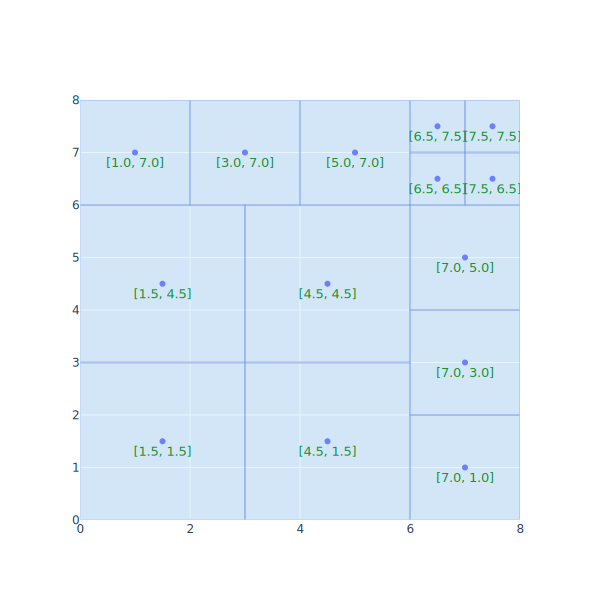

------------
[[-1.  3.  3.  7. -1. -1.  4.  4.]
 [-1.  3.  3.  8.  9. -1.  4.  4.]
 [-1.  5.  5. -1.  1.  1.  1. 10.]
 [-1.  5.  5. -1.  1.  1.  1. 11.]
 [-1.  2.  2.  2.  1.  1.  1. 12.]
 [-1.  2.  2.  2.  6.  6.  0.  0.]
 [-1.  2.  2.  2.  6.  6.  0.  0.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]
------------
C.center_list=['[3.5, 5.5]', '[5.5, 2.5]', '[1.0, 2.0]', '[1.0, 7.0]', '[3.0, 2.0]', '[6.0, 5.0]', '[0.5, 3.5]', '[1.5, 3.5]', '[1.5, 4.5]', '[2.5, 7.5]', '[3.5, 7.5]', '[4.5, 7.5]']
------------



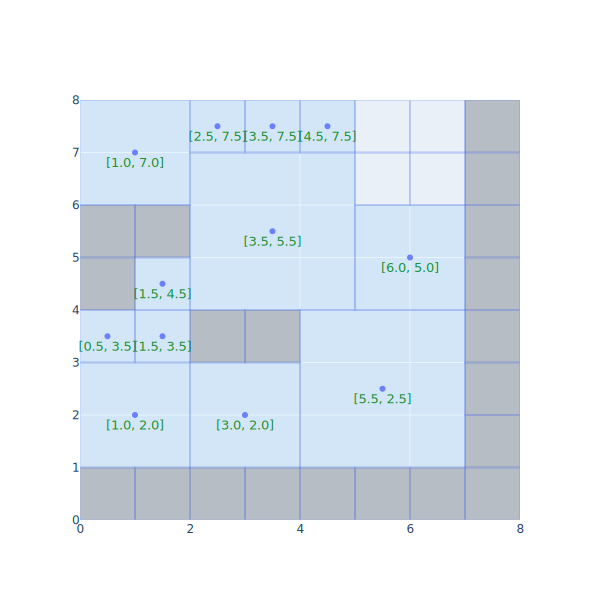

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Simple OOP based python square packing implementation.

@Author: bmetenko
@Date: 22May2022
@Links: https://github.com/bmetenko
"""
#####################################################################

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
from squares import Square, SquareCanvas, check_bounds

# pio.renderers.default = "plotly_mimetype+notebook"
pio.renderers.default = "svg"

#####################################################################

list_square_radii_1 = [3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]
list_squares_1 = [Square(radius) for radius in list_square_radii_1]

B = SquareCanvas(max=8, contents=list_squares_1)

separator = "------------\n"
print(f"{B.contents=}\n"
f"{separator}{B.frame}\n"
f"{separator}{B.y_list=}\n"
f"{separator}{B.x_list=}\n"
f"{separator}{B.center_list=}"
f"{separator}")

B.generate_plotly()

#####################################################################
custom_frame = \
np.array([
    [-1.0, 0.0, 0.0, 0.0,-1.0,-1.0, 0.0, 0.0],
    [-1.0, 0.0, 0.0, 0.0, 0.0,-1.0, 0.0, 0.0],
    [-1.0, 0.0, 0.0,-1.0, 0.0, 0.0, 0.0, 0.0],
    [-1.0, 0.0, 0.0,-1.0, 0.0, 0.0, 0.0, 0.0],
    [-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
])

list_square_radii_2 = [3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]
list_squares_2 = [Square(i) for i in list_square_radii_2]
C = SquareCanvas(contents=list_squares_2, frame_override=custom_frame)
print(f"{separator}{C.frame}\n{separator}{C.center_list=}\n{separator}")
C.generate_plotly()

#####################################################################


[[-1  0 -1 ...  0  0 -1]
 [ 0 -1  0 ...  0 -1 -1]
 [-1  0  0 ... -1 -1 -1]
 ...
 [ 0  0 -1 ...  0  0  0]
 [ 0 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]]
D.frame=array([[-1,  6, -1, ..., 11,  0, -1],
       [ 0, -1,  0, ..., 11, -1, -1],
       [-1, 13, 13, ..., -1, -1, -1],
       ...,
       [ 0,  0, -1, ...,  0,  0,  0],
       [ 0, -1, -1, ...,  0,  0,  0],
       [-1, -1, -1, ...,  0,  0,  0]])


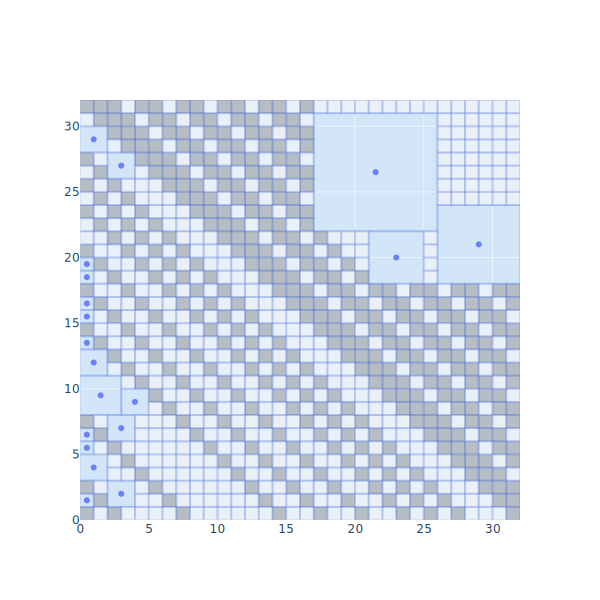

In [2]:
import PIL.Image
I = np.asarray(PIL.Image.open('bw_sprite1.png')).astype(int)
where_not0 = np.where(I != 0)
where_0 = np.where(I == 0)

I[where_0] = 0
I[where_not0] = -1
print(I)

list_square_radii_3 = [9, 6, 4, 3, 2, 1, 1, *[1,2]*3, *[1,2]*3]
list_squares_3 = [Square(i) for i in list_square_radii_3]
D = SquareCanvas(contents=list_squares_3, frame_override=I)
a = D.frame
print(f"{D.frame=}")
D.generate_plotly(show_text=False)
